In [1]:
import os
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [67]:
Dataset = pd.read_csv("C:\\Users\\Mitul Tandon\\Downloads\\Processed_Combined_IoT_dataset.csv")
Dataset

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,current_temperature,door_state,fridge_temperature,humidity,latitude,light_status,longitude,motion_status,pressure,sphone_signal,temp_condition,temperature,thermostat_status,label
0,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.930769,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0
1,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.588462,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0
2,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.076923,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1,0
3,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.292308,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1,0
4,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.746154,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401114,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.076923,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.6,0.517307,1,1
401115,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.846154,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.0,0.517307,1,1
401116,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.480769,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.0,0.517307,1,1
401117,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.307692,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.6,0.517307,1,1


In [86]:
X=Dataset.drop(columns=["temperature"])
y=Dataset["temperature"]

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [136]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,zero_one_loss
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
results = confusion_matrix(y_test, y_pred)
error = zero_one_loss(y_test, y_pred)
print(results)
print(error)

Accuracy: 1.00
[[118593      0]
 [     0   1743]]
0.0


In [137]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
TP = results[0,0]
FP =  results[0,1]
TN =  results[1,0]
FN = results[1,1]
FPR = FP/(FP+TN)
print("FPR is:",FPR)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    118593
           1       1.00      1.00      1.00      1743

    accuracy                           1.00    120336
   macro avg       1.00      1.00      1.00    120336
weighted avg       1.00      1.00      1.00    120336

FPR is: nan


Text(0.5, 427.9555555555555, 'Predicted label')

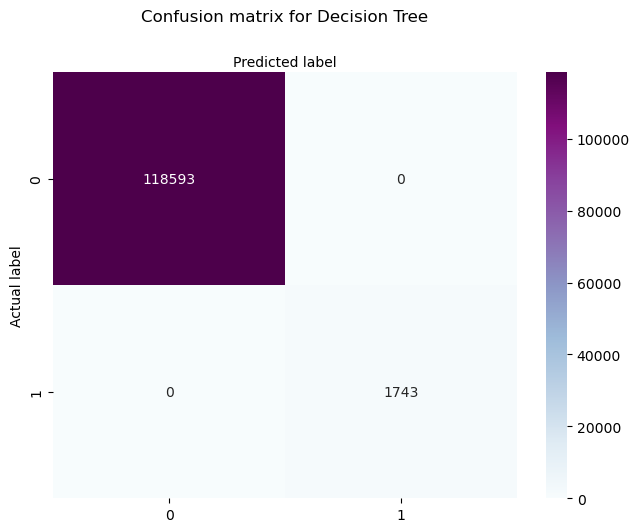

In [138]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(results), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Decision Tree', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rfc = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
results = confusion_matrix(y_test, y_pred)
error = zero_one_loss(y_test, y_pred)
print(results)
print(error)

Accuracy: 0.99
[[118593      0]
 [   738   1005]]
0.006132828081372166


In [141]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
TP = results[0,0]
FP =  results[0,1]
TN =  results[1,0]
FN = results[1,1]
FPR = FP/(FP+TN)
print("FPR is:",FPR)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    118593
           1       1.00      0.58      0.73      1743

    accuracy                           0.99    120336
   macro avg       1.00      0.79      0.86    120336
weighted avg       0.99      0.99      0.99    120336

FPR is: 0.0


Text(0.5, 427.9555555555555, 'Predicted label')

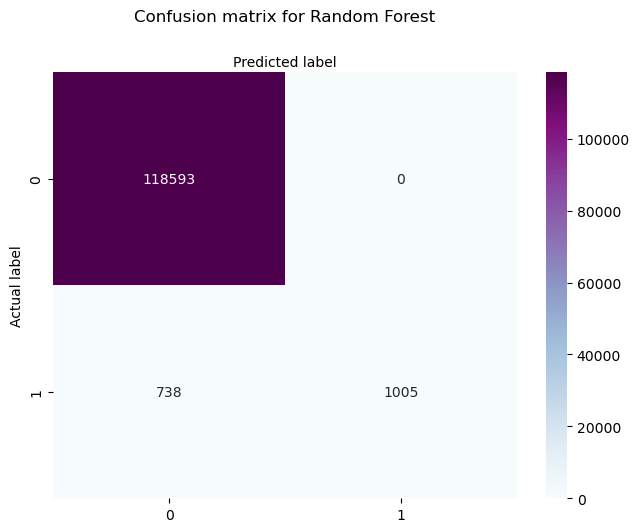

In [142]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(results), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [143]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
results = confusion_matrix(y_test, y_pred)
error = zero_one_loss(y_test, y_pred)
print(results)
print(error)

Accuracy: 0.66
[[77414 41179]
 [    0  1743]]
0.3422001728493551


In [144]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
TP = results[0,0]
FP =  results[0,1]
TN =  results[1,0]
FN = results[1,1]
FPR = FP/(FP+TN)
print("FPR is:",FPR)

              precision    recall  f1-score   support

           0       1.00      0.65      0.79    118593
           1       0.04      1.00      0.08      1743

    accuracy                           0.66    120336
   macro avg       0.52      0.83      0.43    120336
weighted avg       0.99      0.66      0.78    120336

FPR is: 1.0


Text(0.5, 427.9555555555555, 'Predicted label')

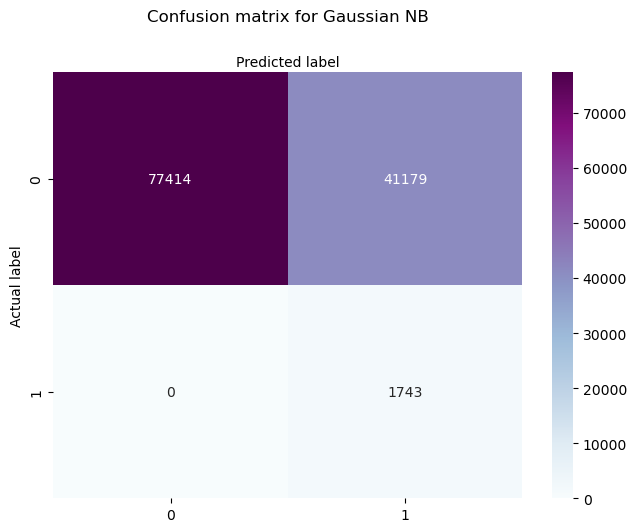

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(results), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Gaussian NB', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [158]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)  
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
results = confusion_matrix(y_test, y_pred)
error = zero_one_loss(y_test, y_pred)
print(results)
print(error)

Accuracy: 1.00
[[118593      0]
 [     0   1743]]
0.0


In [147]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
TP = results[0,0]
FP =  results[0,1]
TN =  results[1,0]
FN = results[1,1]
FPR = FP/(FP+TN)
print("FPR is:",FPR)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    118593
           1       1.00      1.00      1.00      1743

    accuracy                           1.00    120336
   macro avg       1.00      1.00      1.00    120336
weighted avg       1.00      1.00      1.00    120336

FPR is: nan


Text(0.5, 427.9555555555555, 'Predicted label')

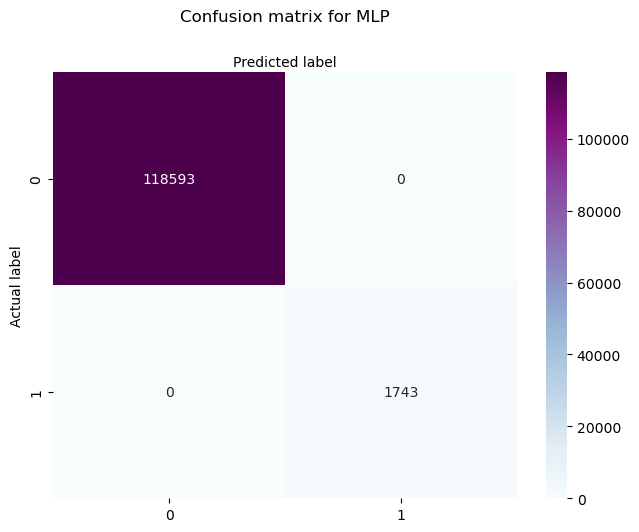

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(results), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for MLP', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [151]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier( n_estimators=50, random_state=42)  
abc.fit(X_train, y_train)

y_pred = abc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
results = confusion_matrix(y_test, y_pred)
error = zero_one_loss(y_test, y_pred)
print(results)
print(error)

Accuracy: 1.00
[[118593      0]
 [     0   1743]]
0.0


In [152]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
TP = results[0,0]
FP =  results[0,1]
TN =  results[1,0]
FN = results[1,1]
FPR = FP/(FP+TN)
print("FPR is:",FPR)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    118593
           1       1.00      1.00      1.00      1743

    accuracy                           1.00    120336
   macro avg       1.00      1.00      1.00    120336
weighted avg       1.00      1.00      1.00    120336

FPR is: nan


Text(0.5, 427.9555555555555, 'Predicted label')

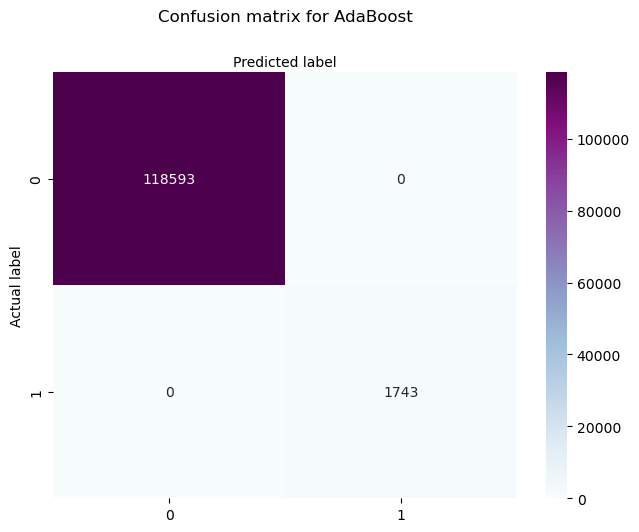

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(results), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for AdaBoost', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [155]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)  
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
results = confusion_matrix(y_test, y_pred)
error = zero_one_loss(y_test, y_pred)
print(results)
print(error)

Accuracy: 1.00
[[118593      0]
 [     0   1743]]
0.0


In [156]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
TP = results[0,0]
FP =  results[0,1]
TN =  results[1,0]
FN = results[1,1]
FPR = FP/(FP+TN)
print("FPR is:",FPR)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    118593
           1       1.00      1.00      1.00      1743

    accuracy                           1.00    120336
   macro avg       1.00      1.00      1.00    120336
weighted avg       1.00      1.00      1.00    120336

FPR is: nan


Text(0.5, 427.9555555555555, 'Predicted label')

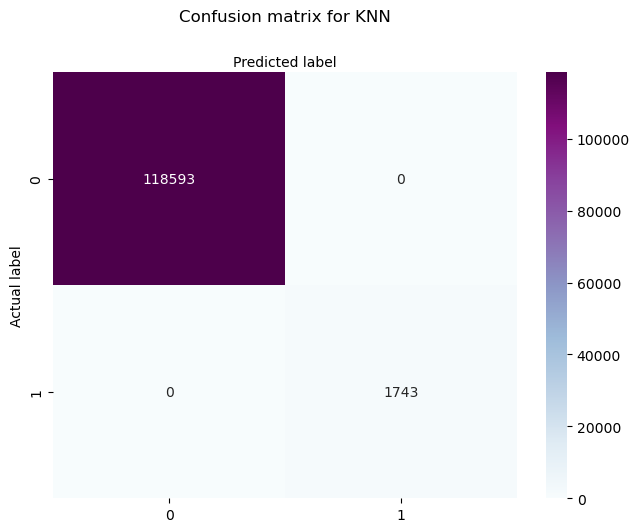

In [157]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(results), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for KNN', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

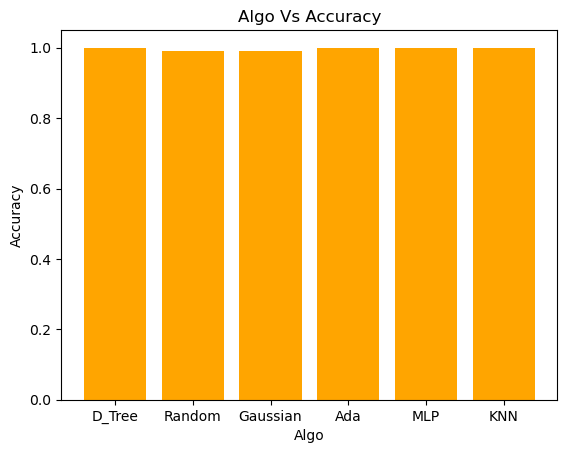

In [167]:
import matplotlib.pyplot as plt
   
Algo = ['D_Tree','Random','Gaussian','Ada', 'MLP', 'KNN']

Accuracy = [1.00,0.99,0.99,1.00,1.00,1.00]
plt.bar(Algo, Accuracy,color='orange')
plt.title('Algo Vs Accuracy')
plt.xlabel('Algo')
plt.ylabel('Accuracy')
plt.show()